In [1]:
import numpy as np

def min_zero_row(zero_mat, mark_zero):
    
    '''
    The function can be splitted into two steps:
    #1 The function is used to find the row which containing the fewest 0.
    #2 Select the zero number on the row, and then marked the element corresponding row and column as False
    '''

    #Find the row
    #min_row = [number of zeroes, row number]
    min_row = [99999, -1]
    for row_num in range(zero_mat.shape[0]): 
#         print(row_num)
#         print(zero_mat)
#         print(np.sum(zero_mat[row_num] == True) > 0 and min_row[0] > np.sum(zero_mat[row_num] == True))
#         print('np.sum(zero_mat[row_num] == True):', np.sum(zero_mat[row_num] == True))
#         print('min_row', min_row)
        if np.sum(zero_mat[row_num] == True) > 0 and min_row[0] > np.sum(zero_mat[row_num] == True):
            min_row = [np.sum(zero_mat[row_num] == True), row_num]

    # Marked the specific row and column as False
    # zero_index = index of zeroth element in min_row (row with minimum zeroes)
    zero_index = np.where(zero_mat[min_row[1]] == True)[0][0]
    mark_zero.append((min_row[1], zero_index))
    zero_mat[min_row[1], :] = False # change row to false
    zero_mat[:, zero_index] = False # change column to false


def mark_matrix(mat):
    '''
    Finding the returning possible solutions for LAP problem.
    '''
    #Transform the matrix to boolean matrix(0 = True, others = False)
    cur_mat = mat
    zero_bool_mat = (cur_mat == 0)
    zero_bool_mat_copy = zero_bool_mat.copy()

    #Recording possible answer positions by marked_zero
    marked_zero = []
    while (True in zero_bool_mat_copy):
        min_zero_row(zero_bool_mat_copy, marked_zero)

    #Recording the row and column positions seperately.
    marked_zero_row = []
    marked_zero_col = []
    
    for i in range(len(marked_zero)):
        marked_zero_row.append(marked_zero[i][0]) # list of row indices
        marked_zero_col.append(marked_zero[i][1]) # list of column indices

    #Step 2-2-1
    non_marked_row = list(set(range(cur_mat.shape[0])) - set(marked_zero_row))

    marked_cols = []
    check_switch = True
    while check_switch:
        check_switch = False
        for i in range(len(non_marked_row)):
            row_array = zero_bool_mat[non_marked_row[i], :]
            for j in range(row_array.shape[0]):
                #Step 2-2-2
                if row_array[j] == True and j not in marked_cols:
                    #Step 2-2-3
                    marked_cols.append(j)
                    check_switch = True

        for row_num, col_num in marked_zero:
            #Step 2-2-4
            if row_num not in non_marked_row and col_num in marked_cols:
                #Step 2-2-5
                non_marked_row.append(row_num)
                check_switch = True
    #Step 2-2-6
    marked_rows = list(set(range(mat.shape[0])) - set(non_marked_row))

    return(marked_zero, marked_rows, marked_cols)

def adjust_matrix(mat, cover_rows, cover_cols):
    cur_mat = mat
    non_zero_element = []

    #Step 4-1
    for row in range(len(cur_mat)):
        if row not in cover_rows:
            for i in range(len(cur_mat[row])):
                if i not in cover_cols:
                    non_zero_element.append(cur_mat[row][i])
    min_num = min(non_zero_element)

    #Step 4-2
    for row in range(len(cur_mat)):
        if row not in cover_rows:
            for i in range(len(cur_mat[row])):
                if i not in cover_cols:
                    cur_mat[row, i] = cur_mat[row, i] - min_num
    #Step 4-3
    for row in range(len(cover_rows)):  
        for col in range(len(cover_cols)):
            cur_mat[cover_rows[row], cover_cols[col]] = cur_mat[cover_rows[row], cover_cols[col]] + min_num
    return cur_mat

def hungarian(mat): 
    dim = mat.shape[0]
    cur_mat = mat

    #Step 1 - Every column and every row subtract its internal minimum
    for row_num in range(mat.shape[0]): 
        cur_mat[row_num] = cur_mat[row_num] - np.min(cur_mat[row_num])
#         print(cur_mat)
    
    for col_num in range(mat.shape[1]): 
#         cur_mat[:,col_num] = cur_mat[:,col_num] - np.min(cur_mat[:,col_num])
        cur_mat[col_num] = cur_mat[col_num] - np.min(cur_mat[col_num])

    zero_count = 0
    while zero_count < dim:
        #Step 2 & 3
        ans_pos, marked_rows, marked_cols = mark_matrix(cur_mat)
        zero_count = len(marked_rows) + len(marked_cols)

        if zero_count < dim:
            cur_mat = adjust_matrix(cur_mat, marked_rows, marked_cols)

    return ans_pos

def output(mat, pos):
    total = 0
    ans_mat = np.zeros((mat.shape[0], mat.shape[1]))
    for i in range(len(pos)):
        total += mat[pos[i][0], pos[i][1]]
        ans_mat[pos[i][0], pos[i][1]] = mat[pos[i][0], pos[i][1]]
    return total, ans_mat

'''Hungarian Algorithm: 
Finding the minimum value in linear assignment problem.
Therefore, we can find the minimum value set in net matrix 
by using Hungarian Algorithm. In other words, the maximum value
and elements set in cost matrix are available.'''


#The matrix who you want to find the minimum sum
# minimizing_data_matrix = np.array([[7, 6, 2, 9, 2],
#             [6, 2, 1, 3, 9],
#             [5, 6, 8, 9, 5],
#             [6, 8, 5, 8, 6],
#             [9, 5, 6, 4, 7]])
# ans_pos = hungarian(minimizing_data_matrix.copy())#Get the element position.
# ans, ans_mat = output(minimizing_data_matrix, ans_pos)#Get the minimum or maximum value and corresponding matrix.
# print('The optimal kidney pairs',ans_pos)

#Show the result
print(f"Linear Assignment problem result: {ans:.0f}\n{ans_mat}")

#If you want to find the maximum value, using the code as follows: 
#Using maximum value in the minimizing_data_matrix and minimizing_data_matrix to get net_matrix
data_matrix = np.array([[7, 6, 2, 9, 2],
            [6, 2, 1, 3, 9],
            [5, 6, 8, 9, 5],
            [6, 8, 5, 8, 6],
            [9, 5, 6, 4, 7]])
max_value = np.max(data_matrix)
minimizing_data_matrix = max_value - data_matrix
ans_pos = hungarian(minimizing_data_matrix.copy())#Get the element position.
ans, ans_mat = output(data_matrix, ans_pos)#Get the minimum or maximum value and corresponding matrix.
print('The optimal kidney pairs',ans_pos)
#Show the result
print(f"Linear Assignment problem result: {ans:.0f}\n{ans_mat}")

The optimal kidney pairs [(0, 4), (2, 0), (3, 2), (1, 1), (4, 3)]
Linear Assignment problem result: 18
[[0. 0. 0. 0. 2.]
 [0. 2. 0. 0. 0.]
 [5. 0. 0. 0. 0.]
 [0. 0. 5. 0. 0.]
 [0. 0. 0. 4. 0.]]
The optimal kidney pairs [(0, 3), (1, 4), (2, 2), (3, 1), (4, 0)]
Linear Assignment problem result: 43
[[0. 0. 0. 9. 0.]
 [0. 0. 0. 0. 9.]
 [0. 0. 8. 0. 0.]
 [0. 8. 0. 0. 0.]
 [9. 0. 0. 0. 0.]]


# Visualization 1

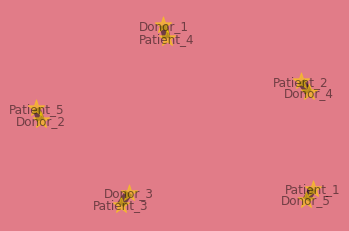

In [41]:

# importing networkx
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
 
donor_list = ['Donor_1', 'Donor_2', 'Donor_3', 'Donor_4', 'Donor_5' ]
patient_list = ['Patient_1', 'Patient_2', 'Patient_3', 'Patient_4', 'Patient_5' ]

g = nx.Graph()
 
for node in ans_pos:
    g.add_edge(donor_list[node[0]], patient_list[node[1]])

pos = nx.spring_layout(G, seed=3113794652)  # positions for all nodes

labels = {}
for i in donor_list:
    labels[i] = i
    
for i in patient_list:
    labels[i] = i
    
# labels['Donor_1'] = 'Donor_1'
fig, ax = plt.subplots()
nx.draw(g, pos, width=8, alpha=0.5, labels = labels,node_shape='*', font_size=12, font_color="black", node_color='gold',edge_color='black')


ax.set_facecolor('#E17C88')
ax.axis('off')
fig.set_facecolor('#E17C88')
plt.show()
# plt.savefig("filename.png")

# Visualization 2

In [8]:
from pyvis.network import Network

net = Network()

for i in range(len(donor_list)):
    net.add_node(i, label=donor_list[i],color='#3da831')

# i has a value of length of donor_list now
# we need to continue adding nodes with incrementing index from last node of donor 
# We shouldn't be generating node numbers from 1 because it has already been assigned to donor nodes

for i in range(len(patient_list)):
    net.add_node(i + len(patient_list), label=patient_list[i], color = '#3155a8')

for node in ans_pos:
    net.add_edge(int(node[0]), int(node[1]) + len(patient_list),  value=2)

net.repulsion(node_distance=100, spring_length=100)
net.show('node1.html')